In [153]:
import pandas as pd
import numpy as np

In [154]:
year=[]
for i in range(2005,2022):
    for j in range(1,13):
        a = format(j, '02')
        year.append(str(i)+" "+str(a))

year.append('2022 01')
year.append('2022 02')
year.append('2022 03')
year.append('2022 04')
len(year)
year[132:180]

['2016 01',
 '2016 02',
 '2016 03',
 '2016 04',
 '2016 05',
 '2016 06',
 '2016 07',
 '2016 08',
 '2016 09',
 '2016 10',
 '2016 11',
 '2016 12',
 '2017 01',
 '2017 02',
 '2017 03',
 '2017 04',
 '2017 05',
 '2017 06',
 '2017 07',
 '2017 08',
 '2017 09',
 '2017 10',
 '2017 11',
 '2017 12',
 '2018 01',
 '2018 02',
 '2018 03',
 '2018 04',
 '2018 05',
 '2018 06',
 '2018 07',
 '2018 08',
 '2018 09',
 '2018 10',
 '2018 11',
 '2018 12',
 '2019 01',
 '2019 02',
 '2019 03',
 '2019 04',
 '2019 05',
 '2019 06',
 '2019 07',
 '2019 08',
 '2019 09',
 '2019 10',
 '2019 11',
 '2019 12']

In [155]:
pre_kospi=pd.read_csv('C:/Users/jangd/OneDrive/사진/문서/GitHub/git_hub_0420/python/project/dataset/pre_kospi.csv')
pre_kospi['날짜']=pd.to_datetime(pre_kospi['날짜'])
pre_kospi.dtypes
pre_kospi_month=pre_kospi.loc[779:1512]
# pre_kospi_month=pre_kospi
pre_kospi_month


,Unnamed: 0,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수
779,779,2195.44,-0.0176,2019-02-28,-618,-2536,3169
780,780,2234.79,0.0037,2019-02-27,-1116,-573,1519
781,781,2226.60,-0.0027,2019-02-26,-299,526,-111
782,782,2232.56,0.0009,2019-02-25,91,-796,803
783,783,2230.50,0.0008,2019-02-22,-342,-45,401
...,...,...,...,...,...,...,...
1508,1508,1946.12,-0.0060,2016-03-08,1060,-961,-613
1509,1509,1957.87,0.0011,2016-03-07,-536,2011,-1988
1510,1510,1955.63,-0.0013,2016-03-04,-455,1598,-1321
1511,1511,1958.17,0.0055,2016-03-03,-3148,4960,-2354


In [156]:
pre_kospi_month_foreign=pd.DataFrame(pre_kospi_month[['외국인순매수','날짜']])
pre_kospi_month['년도']=pre_kospi_month['날짜'].dt.strftime("%Y ")
pre_kospi_month['월']=pre_kospi_month['날짜'].dt.strftime("%m")

pre_kospi_month_sum=pre_kospi_month.groupby(['년도','월'],as_index=False).sum()
pre_kospi_month_sum_for=pd.DataFrame(pre_kospi_month_sum['외국인순매수'])
pre_kospi_month_sum_for
# # pre_kospi_month_foreign['날짜'].dt.year

C:\Users\jangd\AppData\Local\Temp\ipykernel_25996\3038767259.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_kospi_month['년도']=pre_kospi_month['날짜'].dt.strftime("%Y ")
C:\Users\jangd\AppData\Local\Temp\ipykernel_25996\3038767259.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_kospi_month['월']=pre_kospi_month['날짜'].dt.strftime("%m")


,외국인순매수
0,34190
1,19570
2,1798
3,7893
4,39777
5,10792
6,10816
7,3986
8,-3556
9,10106


In [157]:
pre_kospi
pre_kospi['날짜'] = pre_kospi['날짜'].dt.day_name()
month_end = pd.date_range('2005-01-03','2022-04-03', freq='M')
#Get only end of month prices (월말 가격 데이터 생성)
df_month = pre_kospi[pre_kospi['날짜'].isin(month_end)]
df_month.sort_index(ascending=False)

,Unnamed: 0,종가,등락율,날짜,개인순매수,외국인순매수,기관순매수


In [158]:
# pre_kospi_month_sum_for['날짜']=year
# # pre_kospi_month_sum_for.set_index('날짜',inplace=True)
# pre_kospi_month_sum_for


In [159]:
# diff를 통해 차분시행 후, 데이터 Nan 값 제거

pre_kospi_month_sum_for_updown = pre_kospi_month_sum_for.diff(1)['외국인순매수'].dropna()
kospi_diff = pd.DataFrame(pre_kospi_month_sum_for_updown)
print('diff 후 \n', kospi_diff.head())

print('-'*10)
# shift를 통해 1/4일 데이터를 1/5일로 미룸

kospi_shift = pre_kospi_month_sum_for['외국인순매수'].shift(1).dropna()
pre_kospi_month_sum_for_shift_df = pd.DataFrame(kospi_shift)


diff 후 
     외국인순매수
1 -14620.0
2 -17772.0
3   6095.0
4  31884.0
5 -28985.0
----------


In [160]:
kospi_yield = (kospi_diff / pre_kospi_month_sum_for_shift_df) * 100
kospi_yield.columns=['등락률']
kospi_yield

,등락률
1,-42.761041
2,-90.812468
3,338.987764
4,403.952870
5,-72.868743
6,0.222387
7,-63.147189
8,-189.212243
9,-384.195726
10,62.230358


In [161]:
pre_kospi_date=pre_kospi['날짜'].sort_values(ascending=True)
pre_kospi_date

2846       Friday
818        Friday
2634       Friday
2630       Friday
822        Friday
          ...    
3219    Wednesday
1896    Wednesday
529     Wednesday
1190    Wednesday
2140    Wednesday
Name: 날짜, Length: 4281, dtype: object

In [162]:
pre_kospi_for=pd.DataFrame(pre_kospi_month['외국인순매수'])
# pre_kospi_for_1=pd.DataFrame(pre_kospi_for)
# pre_kospi_for
# list=[]

# for i,j in enumerate(pre_kospi_for):
#     list.append(j)
pre_kospi_for

,외국인순매수
779,-2536
780,-573
781,526
782,-796
783,-45
...,...
1508,-961
1509,2011
1510,1598
1511,4960


In [163]:
pre_kospi_for

,외국인순매수
779,-2536
780,-573
781,526
782,-796
783,-45
...,...
1508,-961
1509,2011
1510,1598
1511,4960


In [164]:
for_arr=np.array(list)
print(for_arr)
for_arr.shape

[  14654  -20741   -3243    1048     450   16160  -10990   -8341  -26613
     134  -13293   21440   -5345   -5364    4657  -35400  -26621  -15818
  -24589  -15586   -6491  -16058   10133     591   12392  -10795   27133
    1736  -35361  -48322  -87179  -19155  -21020  -67199  -24664  -85252
  -20089  -30498  -11662    9215  -47683  -49436  -29999  -26698  -45869
  -16437    8550    7694   -8747     482   40525   40767   24481   58517
   36431   48259   14600   18277   22489    6202    -182   53281   51603
  -62497    6848   29026   -5602   42990   39434   16637   36177    3147
  -35092   11176   31471  -25561   -7348   13951  -46018  -13131   16480
  -26804   -4002   62513   42678    3640    -236  -39637   -9756    7187
   50009   32234  -11855   -5451   35557  -18941   15646  -24656  -29715
    7647  -49956    7984   21127   75554   46902   -1981  -17762  -16452
   -7218  -11424   27460   19091   10931   40659   18237   -6274  -20442
   15453  -23255  -10449   13278   28641   46179   

(207,)

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.p

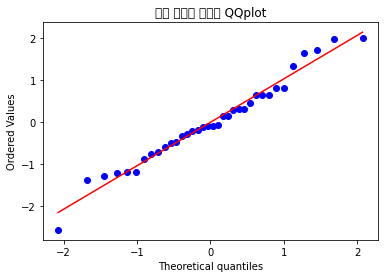

In [165]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() ###stanrdardScaler객체 생성
scaler.fit(pre_kospi_month_sum_for)#iris_df로 훈련을 시킨다. fit은 데이터 변환을 위해서 기준 정보를 설정하는 역할

fore_scaled=scaler.transform(pre_kospi_month_sum_for)  #transform()시 scale 변환된 데이터 셋이 numpy ndarray로 반환됨. 공식을 실행시켜준다고 생각하면됨.

for_df_scaled =pd.DataFrame(data=fore_scaled,columns=['외국인순매수'])#데이터 프레임화
for_df_scaled
# 정규성 검정 (시각화)
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(for_df_scaled['외국인순매수'],plot=plt) 
plt.title('월별 코스피 등락률 QQplot')
plt.show()

C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\jangd\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.p

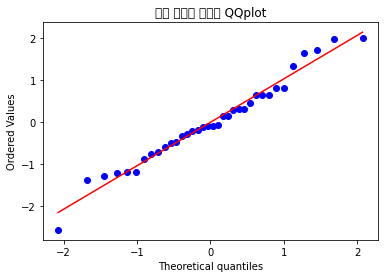

In [166]:
from sklearn.preprocessing import MinMaxScaler
scaler=StandardScaler() ###stanrdardScaler객체 생성
scaler.fit(pre_kospi_month_sum_for)#iris_df로 훈련을 시킨다. fit은 데이터 변환을 위해서 기준 정보를 설정하는 역할

fore_scaled=scaler.transform(pre_kospi_month_sum_for)  #transform()시 scale 변환된 데이터 셋이 numpy ndarray로 반환됨. 공식을 실행시켜준다고 생각하면됨.

for_df_scaled =pd.DataFrame(data=fore_scaled,columns=['외국인순매수'])#데이터 프레임화
for_df_scaled
from scipy.stats import probplot
import matplotlib.pyplot as plt

probplot(for_df_scaled['외국인순매수'],plot=plt) 
plt.title('월별 코스피 등락률 QQplot')
plt.show()

In [167]:
# shapiro 검정 시행
from scipy.stats import shapiro

stats, pval = shapiro(pre_kospi_month_sum_for)

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')
    
# jarque_bera 검정 시행
from scipy.stats import jarque_bera

stats, pval = jarque_bera(pre_kospi_month_sum_for)

if pval < .05:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 있습니다.')
else:
    print(f'p값이 {pval*100 : .8f}% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.')

p값이  64.40474987% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.
p값이  99.28511904% 이므로 정규성을 충족한다는 귀무가설을 5% 유의수준으로 기각할 수 없습니다.


In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

list=[]
for i in range(1,208):
    list.append(pre_kospi_month_sum_for['외국인순매수'][i])

df=pd.DataFrame(list)
df.columns=['외국인순매수']

# 세로 그래프
plt.figure(figsize = (5,12))
sns.boxplot(y='외국인순매수', data = df)
plt.title('vertical graph', size = 15)
plt.show()


KeyError: 36

In [ ]:
df.describe()

,외국인순매수
count,207.000000
mean,-3013.685990
std,29321.571276
min,-125177.000000
25%,-19048.000000
50%,-1981.000000
75%,15053.500000
max,75554.000000


In [ ]:
Q1=-19048.000000
Q3=15053.500000
IQR=Q3-Q1

In [ ]:
Q1-1.5*IQR


-70200.25

In [ ]:
Q3+1.5*IQR

66205.75

In [ ]:
mask =(pre_kospi_month_sum_for['외국인순매수']>=(-70200.25))& (pre_kospi_month_sum_for['외국인순매수']<=(66205.75))
df_n = pre_kospi_month_sum_for.loc[mask]
df_n

,외국인순매수
날짜,
2005 01,8538
2005 02,14654
2005 03,-20741
2005 04,-3243
2005 05,1048
...,...
2021 12,33524
2022 01,-18614
2022 02,8065


In [ ]:
df_final=pd.merge(df_n, kospi_yield,left_index=True, right_index=True,how='left')

In [ ]:
df_final.to_csv('외국인순매수_월별.csv',encoding='cp949')